In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

**Data Exploration**

In [3]:
data = pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Looking to predict the median house value

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Need fo fix the missing non-null values. dropna() takes the non-null values, drops them and saves the result back in the data object.

In [10]:
data.dropna(inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [16]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 0.2 is the standard

In [25]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8896,-118.49,34.02,27.0,4725.0,1185.0,1945.0,1177.0,4.1365,<1H OCEAN,470800.0
7776,-118.09,33.90,37.0,1112.0,222.0,771.0,224.0,4.2132,<1H OCEAN,164600.0
14453,-117.28,32.84,41.0,1420.0,338.0,640.0,314.0,2.9306,NEAR OCEAN,360300.0
17194,-119.79,34.45,24.0,2746.0,433.0,1076.0,380.0,5.8635,NEAR OCEAN,348700.0
12331,-116.48,33.96,11.0,1381.0,300.0,644.0,248.0,2.3382,INLAND,89400.0
...,...,...,...,...,...,...,...,...,...,...
18180,-122.03,37.37,9.0,2966.0,770.0,1430.0,740.0,3.0047,<1H OCEAN,256000.0
18711,-122.42,40.59,24.0,5045.0,972.0,2220.0,979.0,2.6792,INLAND,138900.0
10195,-117.93,33.86,35.0,1216.0,225.0,893.0,228.0,4.0288,<1H OCEAN,184000.0
177,-122.24,37.80,47.0,2046.0,588.0,1213.0,554.0,2.6292,NEAR BAY,182700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

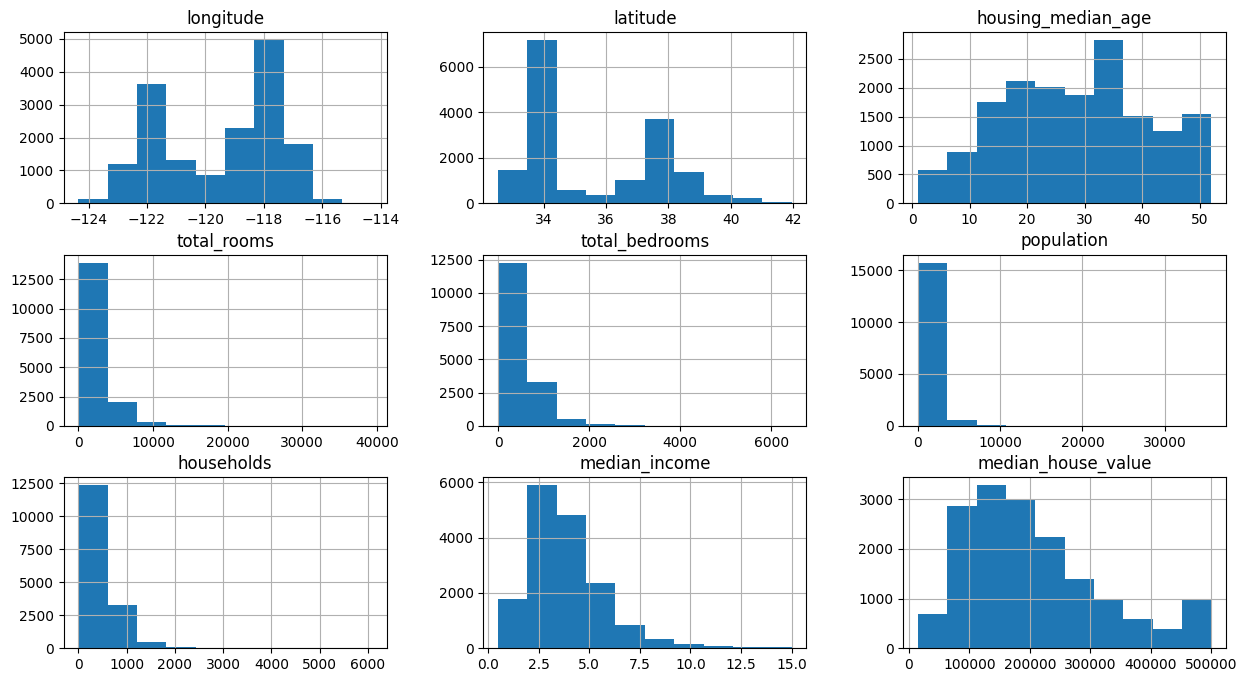

In [26]:
train_data.hist(figsize=(15, 8))

Histogram for distribution of features and correlation with the target variable.

In [30]:
numeric_train_data = train_data.select_dtypes(include=['float64', 'int64']) # Remove non-numeric data
numeric_train_data.corr()   # Correlation matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925649,-0.108217,0.045143,0.071420,0.099050,0.057870,-0.015222,-0.041933
latitude,-0.925649,1.000000,0.011441,-0.036104,-0.067724,-0.106829,-0.072197,-0.079589,-0.145982
housing_median_age,-0.108217,0.011441,1.000000,-0.358120,-0.320813,-0.293328,-0.303317,-0.124660,0.100544
total_rooms,0.045143,-0.036104,-0.358120,1.000000,0.932484,0.858992,0.921291,0.200059,0.134296
total_bedrooms,0.071420,-0.067724,-0.320813,0.932484,1.000000,0.877389,0.979004,-0.002706,0.051068
population,0.099050,-0.106829,-0.293328,0.858992,0.877389,1.000000,0.908174,0.008541,-0.023427
households,0.057870,-0.072197,-0.303317,0.921291,0.979004,0.908174,1.000000,0.018545,0.066564
median_income,-0.015222,-0.079589,-0.124660,0.200059,-0.002706,0.008541,0.018545,1.000000,0.689376
median_house_value,-0.041933,-0.145982,0.100544,0.134296,0.051068,-0.023427,0.066564,0.689376,1.000000


<Axes: >

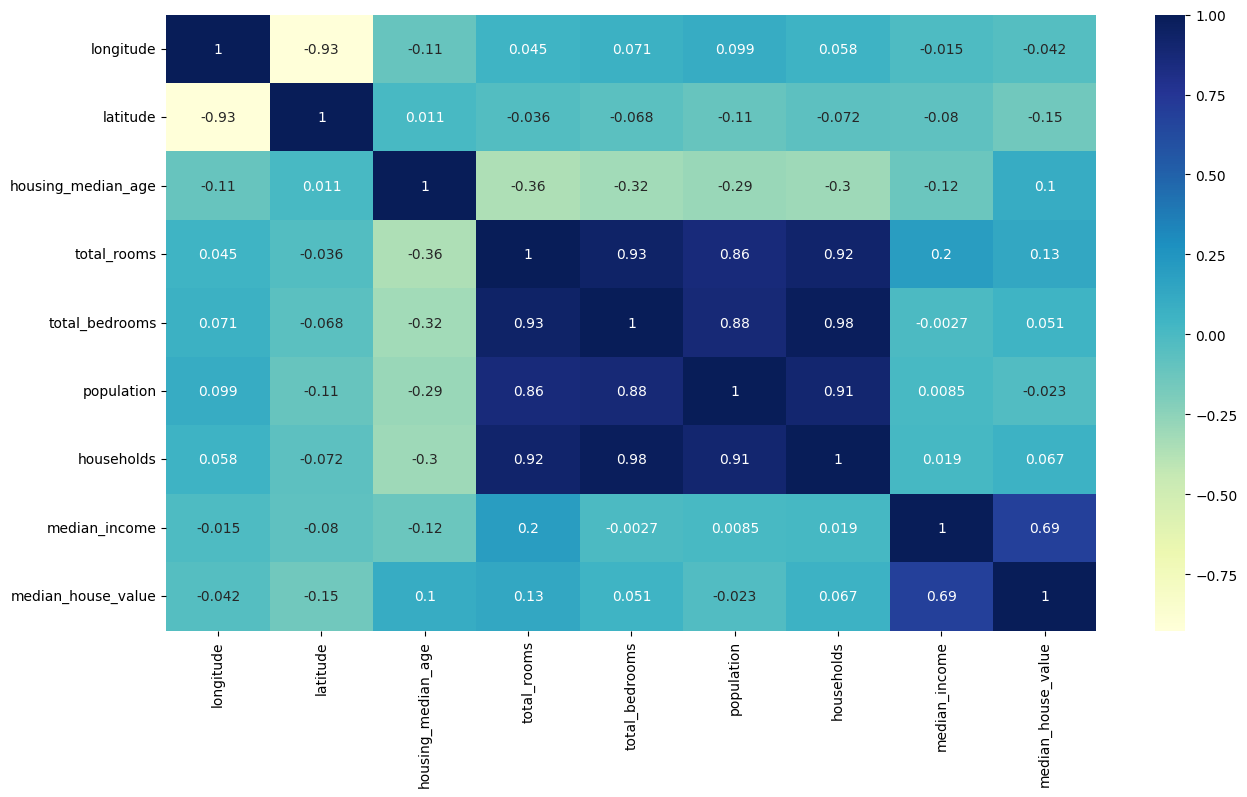

In [32]:
plt.figure(figsize=(15, 8))
sns.heatmap(numeric_train_data.corr(), annot=True, cmap='YlGnBu')

Visualize a correlation matrix

Median income correlates well with target variable median house value. Latitude is negatively correlated.

---

**Data Preprocessing**

---

**Feature Engineering**

---

**Linear Regression Model**

---

**Random Forest Model**